# Andrew Bailey EDA, Data Munging, & Feature Engineering

In [55]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Missing Value Analysis

In [2]:
# TODO: dtypes_hurricane = {"SID": string, "SEASON": ?, "NUMBER": Int64, "BASIN": string}
hurricane_data = pd.read_csv('content/ibtracs.NA.csv')

/var/folders/f2/kfq_cf6x4zz2z1q982s70wb40000gn/T/ipykernel_33387/2745274908.py:2: DtypeWarning: Columns (1,2,3,8,9,14,19,20,23,24,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  hurricane_data = pd.read_csv('content/ibtracs.NA.csv')


In [3]:
hurricane_data.head(2)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,...,,,,,,,,,6,291


In [4]:
loans_data = pd.read_csv('content/loans_parse.csv')

In [5]:
loans_data.head(2)

,Viewpoint Loan Id,DBRS Rated,Loan Name,Deal Name,Deal Type,Prospectus ID,Vintage,Trust Balance (Iss.),Current Trust Balance,Total Property Size,...,Latest Commentary Date,Commentary,DBRS Market Rank,DBRS MSA Group,Senior Debt Balance per SF/Unit/Key,Whole Debt Balance per SF/Unit/Key,Prior Securitizations,CRE/CLO Add Date,CRE/CLO Exit Date,Watchlist Code
0,1018141,Yes,Loudoun Station,FREMF 2022-K152,Agency CMBS,2,2022,77515000.0,77515000.0,NaN,...,11/28/22,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1018142,Yes,Yacht Club,FREMF 2022-K152,Agency CMBS,3,2022,73346000.0,73346000.0,NaN,...,11/28/22,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cities_data = pd.read_csv('content/uscities.csv')

In [7]:
cities_data.head(2)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491


In [10]:
hurricane_data_count = len(hurricane_data)

hurricane_null_count = hurricane_data.isna().sum()
hurricane_null_count = hurricane_null_count.to_frame()
hurricane_null_count = hurricane_null_count.rename(columns={0: "null_count"})
hurricane_null_count = hurricane_null_count.sort_values(by='null_count',ascending=False)
hurricane_null_count['pct_null'] = (hurricane_null_count['null_count'] / hurricane_data_count) * 100
#hurricane_null_count[hurricane_null_count['pct_null'] > 0]

/var/folders/f2/kfq_cf6x4zz2z1q982s70wb40000gn/T/ipykernel_33387/2941742798.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  hurricane_ax.set_xticklabels(hurricane_null_plot.index, rotation=45)


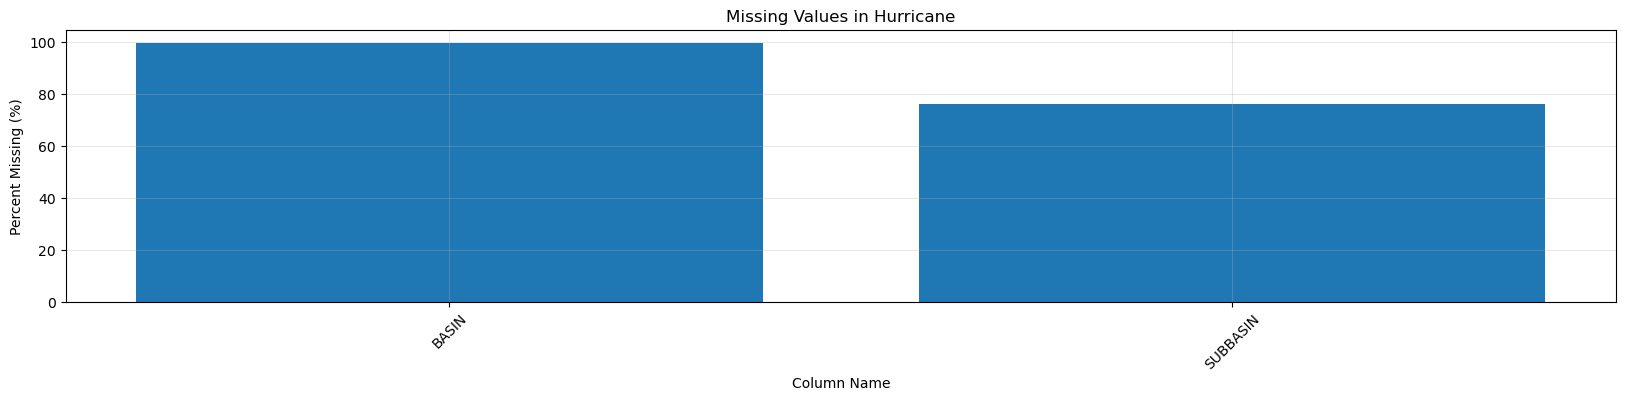

In [68]:
hurricane_null_plot = hurricane_null_count[hurricane_null_count['pct_null'] > 0]

fig_hurricane = plt.figure(figsize=(20,12))
hurricane_ax = fig_hurricane.add_subplot(3,1,1)
hurricane_ax.set_title("Missing Values in Hurricane")
hurricane_ax.grid(alpha=.3)
hurricane_ax.bar(hurricane_null_plot.index, hurricane_null_plot['pct_null'])
hurricane_ax.set_xticklabels(hurricane_null_plot.index, rotation=45)
plt.xlabel('Column Name')
plt.ylabel('Percent Missing (%)')
plt.show()

In [13]:
loan_data_count = len(loans_data)

loans_null_count = loans_data.isna().sum()
loans_null_count = loans_null_count.to_frame()
loans_null_count = loans_null_count.rename(columns={0: "null_count"})
loans_null_count = loans_null_count.sort_values(by='null_count',ascending=False)
loans_null_count['pct_null'] = (loans_null_count['null_count'] / loan_data_count) * 100
#loans_null_count[loans_null_count['pct_null'] > 0]

/var/folders/f2/kfq_cf6x4zz2z1q982s70wb40000gn/T/ipykernel_33387/281900392.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  loans_ax.set_xticklabels(loans_null_plot.index, rotation=90)


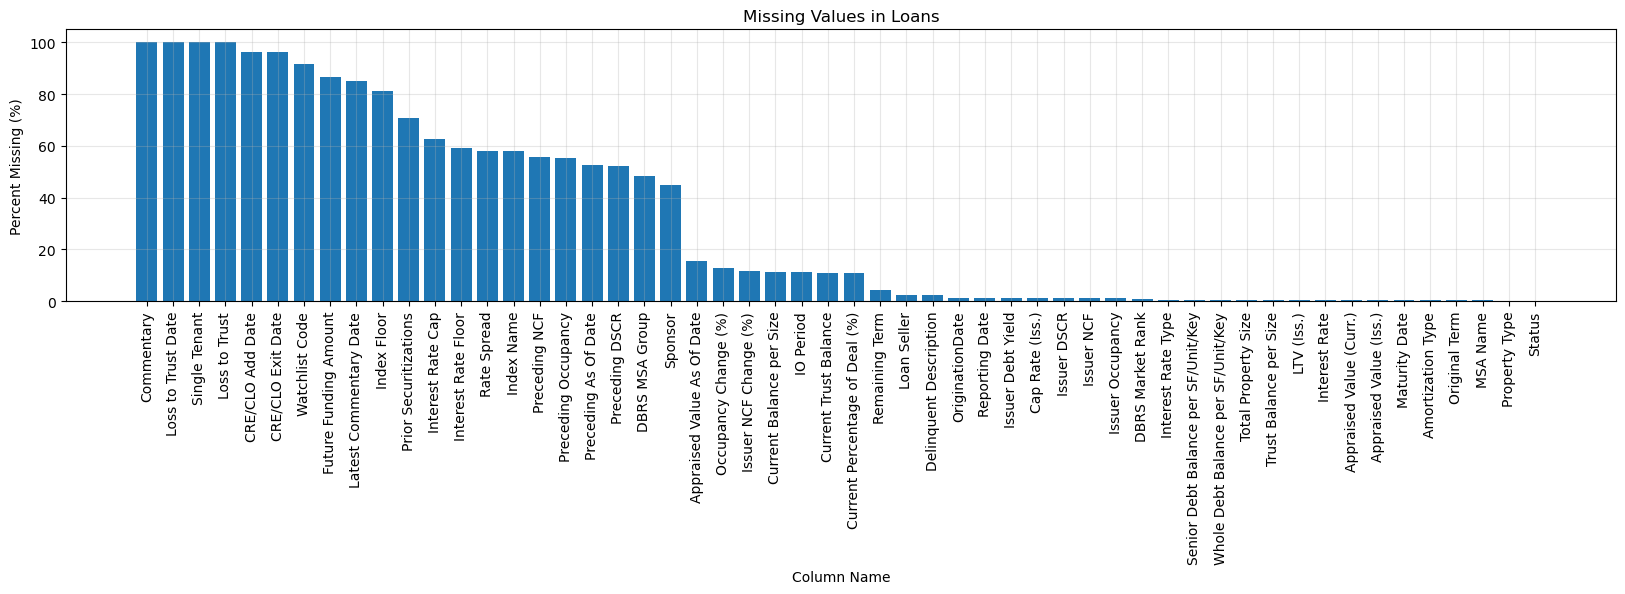

In [67]:
loans_null_plot = loans_null_count[loans_null_count['pct_null'] > 0]

fig_loans = plt.figure(figsize=(20,12))
loans_ax = fig_loans.add_subplot(3,1,1)
loans_ax.set_title("Missing Values in Loans")
loans_ax.grid(alpha=.3)
loans_ax.bar(loans_null_plot.index, loans_null_plot['pct_null'])
loans_ax.set_xticklabels(loans_null_plot.index, rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Percent Missing (%)')
plt.show()

In [62]:
cities_data_count = len(cities_data)

cities_null_count = cities_data.isna().sum()
cities_null_count = cities_null_count.to_frame()
cities_null_count = cities_null_count.rename(columns={0: "null_count"})

cities_null_count = cities_null_count.sort_values(by='null_count',ascending=False)
cities_null_count['pct_null'] = (cities_null_count['null_count'] / cities_data_count) * 100
cities_null_count

cities_null_count

,null_count,pct_null
zips,2,0.006577
city,0,0.000000
density,0,0.000000
ranking,0,0.000000
timezone,0,0.000000
incorporated,0,0.000000
military,0,0.000000
source,0,0.000000
population,0,0.000000
city_ascii,0,0.000000


/var/folders/f2/kfq_cf6x4zz2z1q982s70wb40000gn/T/ipykernel_33387/1191988217.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  city_ax.set_xticklabels(city_null_plot.index, rotation=90)


[Text(0, 0, 'zips')]

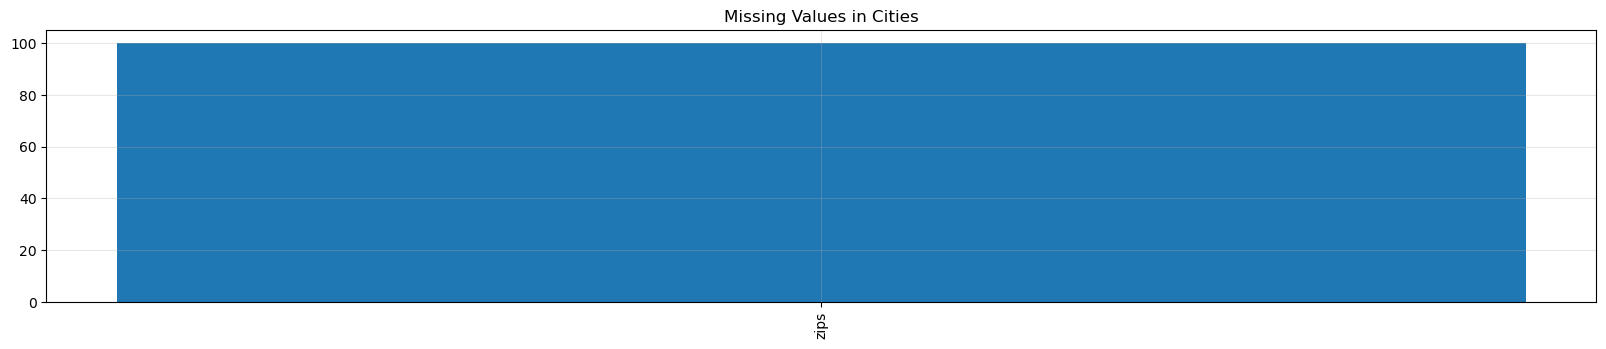

In [63]:
city_null_plot = cities_null_count[cities_null_count['pct_null'] > 0]

fig_city = plt.figure(figsize=(20,12))
city_ax = fig_city.add_subplot(3,1,1)
city_ax.set_title("Missing Values in Cities")
city_ax.grid(alpha=.3)
city_ax.bar(city_null_plot.index, loans_null_plot['pct_null'])
city_ax.set_xticklabels(city_null_plot.index, rotation=90)

In [ ]:
fig_city = plt.figure(figsize=(20,12))
city_ax = fig_city.add_subplot(3,1,1)
city_ax.set_title("Missing Values in Cities")
city_ax.grid(alpha=.3)
city_ax.hist(city_null_plot['pct_null'], color="#03befc", label="Remote Jobs")

## Joined Dataset

In [ ]:
joined_data = pd.read_csv('content/zillow_with_expose_and_pre_exp.csv')

In [ ]:
joined_data.head(10)

In [ ]:
joined_data['expose_status'].unique()